In [36]:
from nltk.corpus import PlaintextCorpusReader
from gensim import corpora, models
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [13]:
sonnetsCorpus = PlaintextCorpusReader("prod", ".*\.txt")

In [14]:
print(len(sonnetsCorpus.fileids()))

482


In [15]:
def get_lists_of_words(corpus, **kwargs): 
    documents = [] # каждый документ у нас будет представлен как список слов
    for fileid in corpus.fileids(): # идем по каждому файлу
        
        # оставляем только слова и приводим их к нижнему регистру
        words = [token.lower() for token in corpus.words(fileid) if any([c for c in token if c.isalpha()])]
        
        # убираем слова длины меньше minlength - если такая задана
        if "minLen" in kwargs and kwargs["minLen"]: 
            words = [word for word in words if len(word) >= kwargs["minLen"]]
        
        # удаляем стоп-слова, если они опять же определены
        if "stopwords" in kwargs and kwargs["stopwords"]: 
            words = [word for word in words if word not in kwargs["stopwords"]]

        
        documents.append(words) # добавляем list of words
    
    return documents # возвращаем наши документы

In [16]:
sonnetsStopwords = nltk.corpus.stopwords.words('english') # загружаем список стоп-слов
sonnetsStopwords += ["thee", "thou", "thy"] # добавляем еще немного слов

In [17]:
sonnetsWords = get_lists_of_words(sonnetsCorpus, stopwords=sonnetsStopwords, minLen=3)

In [18]:
for i in range(0,10): # первые 2 документа
    print("document", str(i), sonnetsWords[i][0:5])

document 0 ['dna', 'testing', 'men', 'limburg', 'start']
document 1 ['dutch', 'financial', 'sector', 'watchdog', 'wants']
document 2 ['children', 'internet', 'savvy', 'think', 'dutch']
document 3 ['delft', 'university', 'refuses', 'listen', 'phd']
document 4 ['kids', 'per', 'class', 'dutch', 'primary']
document 5 ['dutch', 'health', 'council', 'calls', 'tough']
document 6 ['healthy', 'eating', 'costs', 'rise', 'sharply']
document 7 ['dutch', 'happy', 'sex', 'lives', 'women']
document 8 ['call', 'energy', 'drink', 'ban', 'amid']
document 9 ['swallowing', 'cell', 'battery', 'kill', 'child']


In [19]:
def get_lda_from_lists_of_words(lists_of_words, **kwargs):
    dictionary = corpora.Dictionary(lists_of_words) # делаем преобразование (терм -> число)
    corpus = [dictionary.doc2bow(text) for text in lists_of_words] 
    tfidf = models.TfidfModel(corpus) # считаем tf-idf для слов
    corpus_tfidf = tfidf[corpus] #
    kwargs["id2word"] = dictionary # устанавливаем словарь
    return models.LdaModel(corpus_tfidf, **kwargs) # возвращаем топики

In [20]:
%%time
#topic_model = gl.topic_model.create(docs, num_topics=15, num_iterations=3000)

sonnetsLda = get_lda_from_lists_of_words(sonnetsWords, num_topics=50, passes=20,iterations=300)
print(sonnetsLda)

LdaModel(num_terms=12107, num_topics=50, decay=0.5, chunksize=2000)
CPU times: user 4min 45s, sys: 3.04 s, total: 4min 48s
Wall time: 1min 57s


In [21]:
num_terms=10
num_topics = 50

In [22]:
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]
    print("Top  terms for topic #", str(i), ": ", ", ".join(terms))  

Top  terms for topic # 0 :  performance, ajax, night, hermien, manure, denim, day, fraud, weather, suppliers
Top  terms for topic # 1 :  dollar, moon, epsilon, skating, providers, weather, intergamma, expats, league, vendors
Top  terms for topic # 2 :  drinks, cloud, healthy, cryptocurrencies, zara, afm, ban, gaming, cyber, talent
Top  terms for topic # 3 :  citizenship, british, balcony, truck, gamestop, smit, treasure, tests, citizen, heating
Top  terms for topic # 4 :  relatives, award, porn, mother, hanegem, beatrix, classes, became, sex, women
Top  terms for topic # 5 :  index, nam, gender, bloomberg, retest1, mcdonald, meem, women, shell, students
Top  terms for topic # 6 :  mobile, brands, internet, shopping, bowl, facebook, attacks, super, banks, information
Top  terms for topic # 7 :  turkish, cancer, turkey, incident, arrested, cambodia, sexual, dutchman, women, near
Top  terms for topic # 8 :  property, thieves, teenagers, cbre, storm, bikes, eindhoven, abortions, brp, erdog

In [61]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

data = []
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]    
    data.append({'name':'topic '+str(i),'words':", ".join(terms)})
reviews = pd.DataFrame(data=data)
reviews.columns = ['Topic','words']

In [62]:
reviews

,Topic,words
0,topic 0,"performance, ajax, night, hermien, manure, denim, day, fraud, weather, suppliers"
1,topic 1,"dollar, moon, epsilon, skating, providers, weather, intergamma, expats, league, vendors"
2,topic 2,"drinks, cloud, healthy, cryptocurrencies, zara, afm, ban, gaming, cyber, talent"
3,topic 3,"citizenship, british, balcony, truck, gamestop, smit, treasure, tests, citizen, heating"
4,topic 4,"relatives, award, porn, mother, hanegem, beatrix, classes, became, sex, women"
5,topic 5,"index, nam, gender, bloomberg, retest1, mcdonald, meem, women, shell, students"
6,topic 6,"mobile, brands, internet, shopping, bowl, facebook, attacks, super, banks, information"
7,topic 7,"turkish, cancer, turkey, incident, arrested, cambodia, sexual, dutchman, women, near"
8,topic 8,"property, thieves, teenagers, cbre, storm, bikes, eindhoven, abortions, brp, erdogan"
9,topic 9,"nxp, women, kilos, reactor, currencies, crypto, mothers, complaints, brink, bitterballen"


In [23]:
def graph_terms_to_topics(lda, num_terms=10):
    
    # создаем новый граф
    G = nx.Graph()
    plt.figure(figsize=(10,10))

    # создаем вершины
    for i in range(0, lda.num_topics):
        topicLabel = "topic "+str(i)
        terms = [val for val, term in lda.show_topic(i, num_terms)]                
        
        for term in terms:
            G.add_edge(topicLabel, term)
    
    pos = nx.spring_layout(G) # это один из способов визуализации графа
    
    # топики и названия термов будут иметь разный цвет в нашем случае
    g = G.subgraph([topic for topic, _ in pos.items() if "topic " in str(topic)])
    nx.draw_networkx_labels(g, pos,  font_color='r')
    g = G.subgraph([term for term, _ in pos.items() if "topic " not in str(term)])
    nx.draw_networkx_labels(g, pos)
    
    # рисуем
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.1)

    plt.axis('off')
    plt.show()


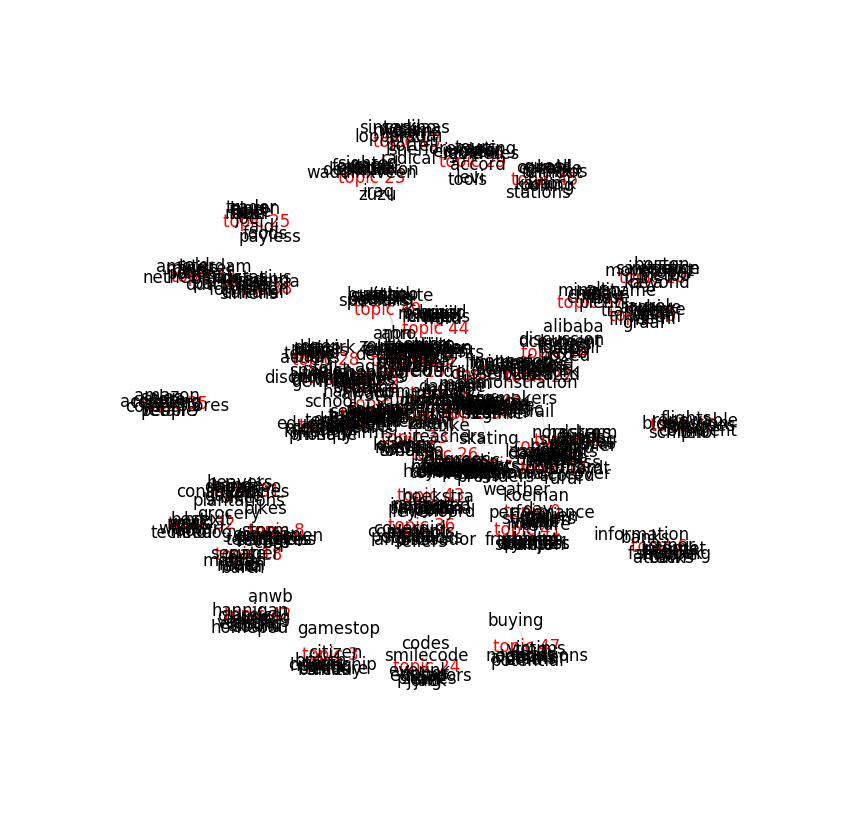

In [24]:
graph_terms_to_topics(sonnetsLda)

In [29]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from gensim.corpora import Dictionary

In [35]:
dictionary = corpora.Dictionary(sonnetsWords)
corpus = [dictionary.doc2bow(doc) for doc in sonnetsWords]
vis_data = gensimvis.prepare(sonnetsLda, corpus, dictionary)
pyLDAvis.display(vis_data)